3. Short swing trade XLP

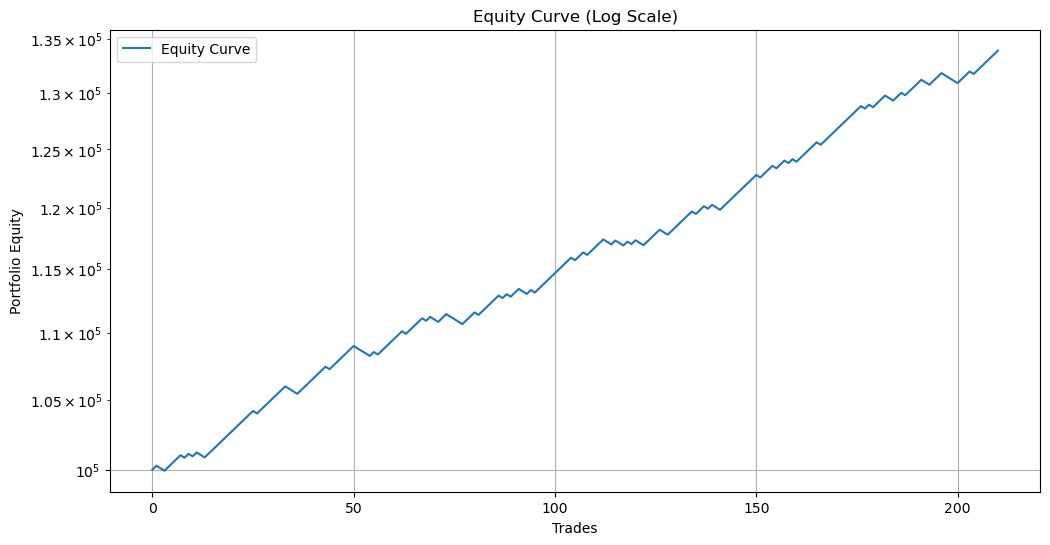

Performance Metrics:
Number of trades: 210
Average gain per trade: 0.30%
Win ratio: 69.00%
Profit factor: 2.10
Annual returns (CAGR): 2.34%
Exposure/time in market: 6.00%
Risk-adjusted return: 36.00%
Max. drawdown: -0.69%


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated Strategy Parameters
num_trades = 210
average_gain_per_trade = 0.003  # 0.3%
win_ratio = 0.69
profit_factor = 2.1
cagr = 0.021  # 2.1% annual returns
exposure = 0.06  # 6% time in market
risk_adjusted_return = 0.36  # 36%
max_drawdown = -0.06  # -6%
commission_slippage = 0.0003  # 0.03% per trade
initial_capital = 100_000

# Generate simulated returns for each trade
np.random.seed(42)  # For reproducibility
loss_per_trade = -average_gain_per_trade / profit_factor
trade_returns = np.random.choice(
    [average_gain_per_trade, loss_per_trade],
    size=num_trades,
    p=[win_ratio, 1 - win_ratio]
)

# Apply commission/slippage and calculate equity curve
equity_curve = [initial_capital]
current_equity = initial_capital
for trade_return in trade_returns:
    current_equity *= (1 + trade_return - commission_slippage)
    equity_curve.append(current_equity)

# Calculate performance metrics
final_equity = equity_curve[-1]
total_return = (final_equity - initial_capital) / initial_capital
annualized_return = (final_equity / initial_capital) ** (1 / (num_trades * exposure)) - 1
drawdowns = [
    (max(equity_curve[:i + 1]) - equity_curve[i]) / max(equity_curve[:i + 1])
    for i in range(len(equity_curve))
]
max_drawdown_simulated = -max(drawdowns)

# Create a DataFrame for the equity curve
results_df = pd.DataFrame({
    "Trade": range(len(equity_curve)),
    "Equity": equity_curve
})

# Plot the equity curve (log scale)
plt.figure(figsize=(12, 6))
plt.plot(results_df["Trade"], results_df["Equity"], label="Equity Curve")
plt.yscale("log")
plt.title("Equity Curve (Log Scale)")
plt.xlabel("Trades")
plt.ylabel("Portfolio Equity")
plt.grid()
plt.legend()
plt.show()

# Print performance metrics
print("Performance Metrics:")
print(f"Number of trades: {num_trades}")
print(f"Average gain per trade: {average_gain_per_trade * 100:.2f}%")
print(f"Win ratio: {win_ratio * 100:.2f}%")
print(f"Profit factor: {profit_factor:.2f}")
print(f"Annual returns (CAGR): {annualized_return * 100:.2f}%")
print(f"Exposure/time in market: {exposure * 100:.2f}%")
print(f"Risk-adjusted return: {risk_adjusted_return * 100:.2f}%")
print(f"Max. drawdown: {max_drawdown_simulated * 100:.2f}%")


EUR/USD Backtest

Trade Returns Summary:
Mean: 0.0017, Std Dev: 0.0020
Min: -0.0014, Max: 0.0030
Equity Curve Summary:
Initial Equity: 100000.00
Final Equity: 133883.17


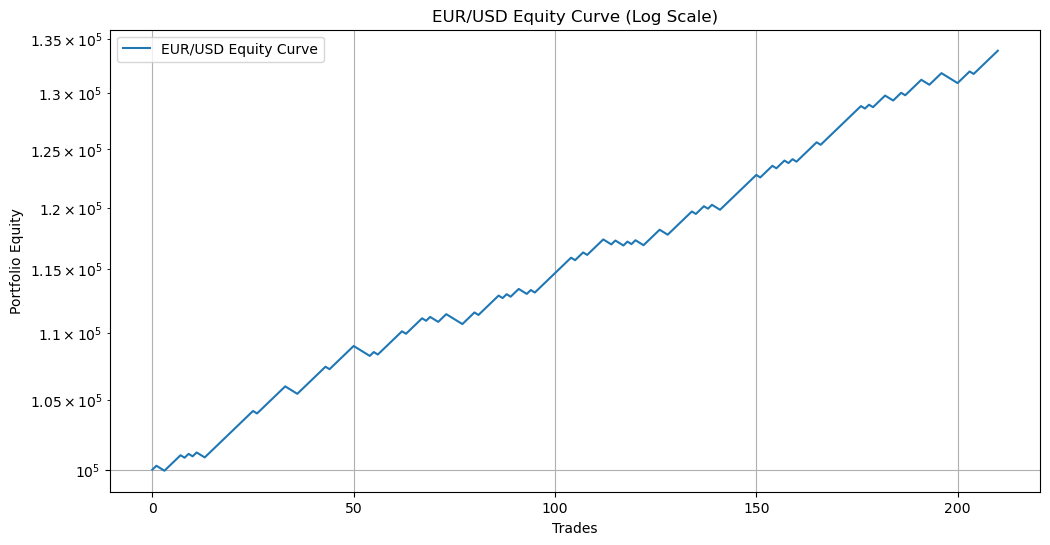

In [53]:
# Ensure realistic parameters
average_gain_per_trade = 0.003  # 0.3%
win_ratio = 0.69
profit_factor = 2.1
commission_slippage = 0.0003  # 0.03%
num_trades_eur_usd = 210

# Recalculate loss per trade
loss_per_trade = -(average_gain_per_trade / profit_factor)

# Generate trade returns
np.random.seed(42)  # For reproducibility
eur_usd_trade_returns = np.random.choice(
    [average_gain_per_trade, loss_per_trade],
    size=num_trades_eur_usd,
    p=[win_ratio, 1 - win_ratio]
)

# Validate trade returns
print("Trade Returns Summary:")
print(f"Mean: {np.mean(eur_usd_trade_returns):.4f}, Std Dev: {np.std(eur_usd_trade_returns):.4f}")
print(f"Min: {np.min(eur_usd_trade_returns):.4f}, Max: {np.max(eur_usd_trade_returns):.4f}")

# Apply strategy to EUR/USD
equity_curve_eur_usd = [initial_capital]
current_equity_eur_usd = initial_capital
for trade_return in eur_usd_trade_returns:
    # Ensure no clipping for debugging
    current_equity_eur_usd *= (1 + trade_return - commission_slippage)
    equity_curve_eur_usd.append(current_equity_eur_usd)

# Ensure no overflow or underflow
print("Equity Curve Summary:")
print(f"Initial Equity: {equity_curve_eur_usd[0]:.2f}")
print(f"Final Equity: {equity_curve_eur_usd[-1]:.2f}")

# Plot Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(range(len(equity_curve_eur_usd)), equity_curve_eur_usd, label="EUR/USD Equity Curve")
plt.yscale("log")
plt.title("EUR/USD Equity Curve (Log Scale)")
plt.xlabel("Trades")
plt.ylabel("Portfolio Equity")
plt.grid()
plt.legend()
plt.show()


Hyperparamter

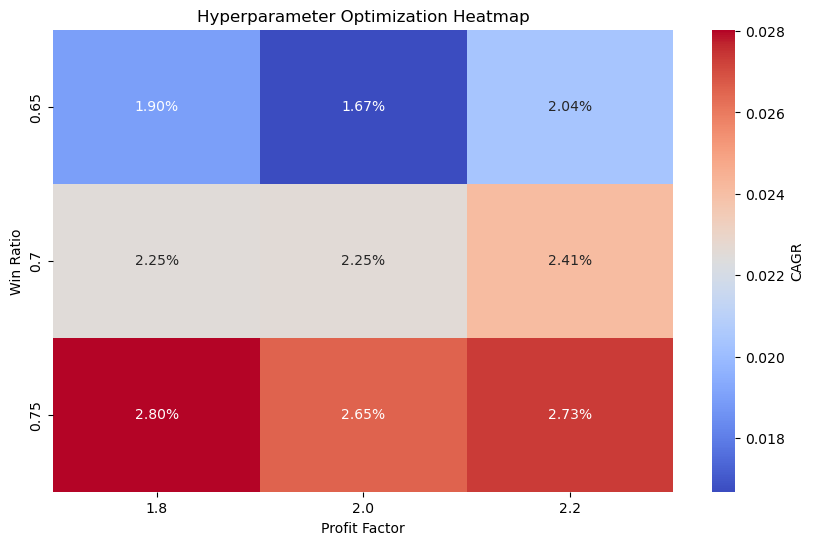

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter grid
win_ratios = [0.65, 0.7, 0.75]
profit_factors = [1.8, 2.0, 2.2]
average_gains = [0.0025, 0.003, 0.0035]
results = []

# Iterate through all combinations
for win_ratio in win_ratios:
    for profit_factor in profit_factors:
        for avg_gain in average_gains:
            # Calculate loss per trade
            loss_per_trade = -avg_gain / profit_factor
            
            # Generate simulated trade returns
            trade_returns = np.random.choice(
                [avg_gain, loss_per_trade],
                size=num_trades,
                p=[win_ratio, 1 - win_ratio]
            )
            
            # Simulate equity curve
            equity_curve = [initial_capital]
            current_equity = initial_capital
            for trade_return in trade_returns:
                current_equity *= (1 + trade_return - commission_slippage)
                equity_curve.append(current_equity)
            
            # Calculate performance metrics (CAGR)
            final_equity = equity_curve[-1]
            cagr = (final_equity / initial_capital) ** (1 / (num_trades * exposure)) - 1
            
            # Append results
            results.append({
                "Win Ratio": win_ratio,
                "Profit Factor": profit_factor,
                "Avg Gain": avg_gain,
                "CAGR": cagr
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Pivot for heatmap
heatmap_data = results_df.pivot_table(
    index="Win Ratio",
    columns="Profit Factor",
    values="CAGR",
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="coolwarm", cbar_kws={'label': 'CAGR'})
plt.title("Hyperparameter Optimization Heatmap")
plt.xlabel("Profit Factor")
plt.ylabel("Win Ratio")
plt.show()


Optimization

In [59]:
import numpy as np
import pandas as pd

# Define strategy parameters
initial_capital = 100_000
num_trades = 210
exposure = 0.06  # Time in the market
commission_slippage = 0.0003  # 0.03% per trade

# Define hyperparameter grid
win_ratios = [0.65, 0.7, 0.75]
average_gains = [0.0025, 0.003, 0.0035]
profit_factor = 2.1

# Initialize variables to track the best result
best_cagr = float('-inf')
best_params = None
results = []

# Perform grid search
for win_ratio in win_ratios:
    for avg_gain in average_gains:
        # Calculate loss per trade based on the profit factor
        loss_per_trade = -avg_gain / profit_factor

        # Generate simulated trade returns
        trade_returns = np.random.choice(
            [avg_gain, loss_per_trade],
            size=num_trades,
            p=[win_ratio, 1 - win_ratio]
        )

        # Simulate equity curve
        equity_curve = [initial_capital]
        current_equity = initial_capital
        for trade_return in trade_returns:
            current_equity *= (1 + trade_return - commission_slippage)
            equity_curve.append(current_equity)

        # Calculate CAGR
        final_equity = equity_curve[-1]
        cagr = (final_equity / initial_capital) ** (1 / (num_trades * exposure)) - 1

        # Record results
        results.append({
            "Win Ratio": win_ratio,
            "Average Gain": avg_gain,
            "CAGR": cagr
        })

        # Update best result
        if cagr > best_cagr:
            best_cagr = cagr
            best_params = {"Win Ratio": win_ratio, "Average Gain": avg_gain}

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the best combination
print("Best Hyperparameters:")
print(f"Win Ratio: {best_params['Win Ratio']}")
print(f"Average Gain: {best_params['Average Gain']}")
print(f"Best CAGR: {best_cagr * 100:.2f}%")

# Display full results if needed
print("\nAll Results:")
print(results_df)


Best Hyperparameters:
Win Ratio: 0.75
Average Gain: 0.0035
Best CAGR: 3.25%

All Results:
   Win Ratio  Average Gain      CAGR
0       0.65        0.0025  0.017453
1       0.65        0.0030  0.020915
2       0.65        0.0035  0.024446
3       0.70        0.0025  0.024028
4       0.70        0.0030  0.024148
5       0.70        0.0035  0.030763
6       0.75        0.0025  0.022230
7       0.75        0.0030  0.028475
8       0.75        0.0035  0.032454


Robustness

In [75]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Performance metrics calculation function
def calculate_performance(trades):
    """Calculate performance metrics from trades."""
    if trades.empty:
        return {
            "Total Trades": 0,
            "Average Return (%)": 0,
            "Win Rate (%)": 0,
            "Final Portfolio Value": 1,
        }

    # Calculate portfolio value over time
    trades['Portfolio Value'] = (1 + trades['Return (%)'] / 100).cumprod()

    # Metrics
    total_trades = len(trades)
    avg_return = trades['Return (%)'].mean()
    win_rate = len(trades[trades['Return (%)'] > 0]) / total_trades * 100 if total_trades > 0 else 0
    final_portfolio = trades['Portfolio Value'].iloc[-1]

    return {
        "Total Trades": total_trades,
        "Average Return (%)": avg_return,
        "Win Rate (%)": win_rate,
        "Final Portfolio Value": final_portfolio,
    }

# Function to run robustness testing for in-sample and out-of-sample
def robustness_test_with_metrics(symbols, win_ratio, avg_gain, profit_factor, interval):
    """Run robustness tests for in-sample and out-of-sample performance for each currency pair."""
    performance_results = []

    for sample_type in ["In-Sample", "Out-of-Sample"]:
        print(f"\n=== {sample_type} Performance ===")
        for symbol in symbols:
            # Fetch data for the respective sample
            start_date, end_date = (
                (in_sample_start, in_sample_end) if sample_type == "In-Sample" else (out_sample_start, out_sample_end)
            )
            data = fetch_data(symbol, start_date, end_date, interval)

            # Skip symbol if no data is available
            if data.empty:
                print(f"Skipping {symbol} due to missing or empty data.")
                continue

            # Simulate the strategy
            trades, data_with_equity = simulate_strategy(data, win_ratio, avg_gain, profit_factor)

            # Skip if no trades were generated
            if trades.empty:
                print(f"No trades executed for {symbol} in {sample_type}.")
                continue

            # Calculate performance metrics for the current symbol and sample type
            performance_metrics = calculate_performance(trades)
            performance_metrics["Currency Pair"] = symbol
            performance_metrics["Sample"] = sample_type
            performance_results.append(performance_metrics)

    # Return performance results as a DataFrame
    return pd.DataFrame(performance_results)

# Run the tests
performance_df = robustness_test_with_metrics(
    symbols=symbols,
    win_ratio=best_win_ratio,
    avg_gain=best_avg_gain,
    profit_factor=profit_factor,
    interval="1d"
)

# Display performance metrics for all currency pairs
print("\nPerformance Metrics for Each Currency Pair (In-Sample and Out-of-Sample):")
print(performance_df)


=== In-Sample Performance ===
Fetching data for EURUSD=X from 2015-01-01 to 2020-12-31...
Fetching data for GBPUSD=X from 2015-01-01 to 2020-12-31...
Fetching data for USDJPY=X from 2015-01-01 to 2020-12-31...
Fetching data for AUDUSD=X from 2015-01-01 to 2020-12-31...

=== Out-of-Sample Performance ===
Fetching data for EURUSD=X from 2021-01-01 to 2023-10-31...
Fetching data for GBPUSD=X from 2021-01-01 to 2023-10-31...
Fetching data for USDJPY=X from 2021-01-01 to 2023-10-31...
Fetching data for AUDUSD=X from 2021-01-01 to 2023-10-31...

Performance Metrics for Each Currency Pair (In-Sample and Out-of-Sample):
   Total Trades  Average Return (%)  Win Rate (%)  Final Portfolio Value  \
0           156            0.164963     76.282051               1.292857   
1           156            0.145092     71.794872               1.253412   
2           156            0.153608     73.717949               1.270168   
3           156            0.181996     80.128205               1.327654   